# 첫째마당. 딥러닝 시작을 위한 준비운동

## Chapter02. 딥러닝의 핵심 미리 보기

### 나의 첫 딥러닝: "10장 폐암 수술 환자의 생존율 예측" 코드 미리보기

#### 1. 환경준비

In [1]:
!pip install tensorflow

from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

#### 2. 데이터 준비

In [2]:
!git clone https://github.com/taehojo/data.git "C:/Users/DY-Main/Desktop/모두의 딥러닝 3rd/data/"  # 깃허브에 준비된 데이터를 가져옵니다.

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --[no-]verbose    be more verbose
    -q, --[no-]quiet      be more quiet
    --[no-]progress       force progress reporting
    --[no-]reject-shallow don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --checkout            opposite of --no-checkout
    --[no-]bare           create a bare repository
    --[no-]mirror         create a mirror repository (implies --bare)
    -l, --[no-]local      to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    --hardlinks           opposite of --no-hardlinks
    -s, --[no-]shared     setup as shared repository
    --[no-]recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --[no-]recursive ...  alias of --recurse-submodules
    -j, --[no-]jobs <n>   number of submodules cloned in parallel
    --[no-]template <template-directory>
            

In [3]:
Data_set = np.loadtxt("C:/Users/DY-Main/Desktop/모두의 딥러닝 3rd/data/ThoraricSurgery3.csv", delimiter=",")  # 수술 환자 데이터를 불러옵니다.

X = Data_set[:,0:16]                                                 # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]

#### 3. 구조 결정

In [4]:
model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\DY-Main\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**경고의 의미 🤔**
"Sequential 모델을 사용할 때는 첫 번째 레이어에 input_dim 인자를 전달하지 말고, Input 객체를 대신 사용하세요."

In [5]:
# 이렇게 하면 에러발생 하지 않음

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(16,)),  # 👈 input_dim=16을 이렇게 바꿔줍니다.
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

#### 4. 모델 실행

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 딥러닝 모델을 실행합니다.
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8351 - loss: 0.6069   
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8540 - loss: 0.4254 
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.4492 
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8376 - loss: 0.4750 
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8276 - loss: 0.4705 


# 둘째마당. 예측 모델의 기본 원리

## Chapter04. 가장 훌륭한 예측선

### 4. 파이썬 코딩으로 확인하는 최소 제곱

#### 1. 환경준비

In [7]:
# 모듈 불러오기
import numpy as np

#### 2. 데이터 준비

In [8]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만들기
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

##### [x와 y의 평균값 구하기]

In [9]:
# x의 평균값 구하기
mx = np.mean(x)

# y의 평균값 구하기
my = np.mean(y)

# 출력하기
print(f"x의 평균은 {mx}입니다.")
print(f"y의 평균은 {my}입니다.")

x의 평균은 5.0입니다.
y의 평균은 90.5입니다.


##### [기울기 공식의 분모와 분자]

$$a = \cfrac{(x - mean(x))(y - mean(y))}{(x - mean(x))^2 의 합}$$

In [10]:
# x 변수에 대한 편차 제곱의 합 구하기(최소제곱법의 분모)

divisor = 0
for i in x:
    xi = np.sum(((i - mx) ** 2))
    divisor = divisor + xi

# x와 y변수의 편차를 구해서 합을 구하는 함수(최소제곱법의 분자)
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

dividend = top(x, mx, y, my)   # 분자값 저장

# 분모, 분자 출력
print(f"분모는 {divisor}입니다.")
print(f"분자는 {dividend}입니다.")

분모는 20.0입니다.
분자는 46.0입니다.


#### 3. 기울기와 y절편 구하기

In [11]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y 절편 b를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print(f"기울기는 {a}입니다.")
print(f"y절편은 {b}입니다.")

기울기는 2.3입니다.
y절편은 79.0입니다.


### 6. 파이썬 코딩으로 확인하는 평균 제곱 오차

#### 1. 환경준비

In [12]:
# 모듈 불러오기

import numpy as np

#### 2. 데이터 준비

In [13]:
# 가상의 기울기 a와 y절편 b를 정하기
fake_a = 3
fake_b = 76

# 공부 시간 x와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

#### 3. 평균제곱오차 구하기

$$평균 제곱 오차 = \cfrac{1}{n}\cdot \sum (y_i -\hat{y_i} )^2 $$

In [14]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수
def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트 만들기
predict_result = []

# 모든 x값을 한 번씩 대입하여 predict_result 리스트 완성하기
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print(f"공부시간={x[i]}, 실제점수={y[i]}, 예측점수={predict(x[i])}")

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [15]:
# 평균 제곱 오차 함수를 각 y 값에 대입하여 최종 값을 구하는 함수입니다.

n=len(x)
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 출력
print(f"평균 제곱 오차는 {str(mse(y, predict_result))}입니다.")

평균 제곱 오차는 11.0입니다.


## chapter05. 선형 회귀 모델: 먼저 긋고 수정하기

### 2. 파이썬 코딩으로 확인하는 선형 회귀

$$평균 제곱 오차 = \cfrac{1}{n}\cdot \sum (y_i -\hat{y_i} )^2$$

$$평균 제곱 오차 = \cfrac{1}{n}\cdot \sum (y_i - (ax_i + b)^2$$

$$a로~ 편미분한~ 결과 = \cfrac{2}{n} \sum -x_i (y_i -(ax_i + b)$$

$$b로~편미분한~ 결과 = \cfrac{2}{n} \sum -(y_i - (ax_i +b))$$

#### 1. 환경준비

In [16]:
import numpy as np
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt

#### 2. 데이터 준비

In [17]:
# 공부 시간 X와 성적 y의 넘파이 배열을 만들기
x = np.array([2, 4, 6, 8], dtype = float)
y = np.array([81, 93, 91, 97], dtype = float)

#### 3. 데이터 분포 확인

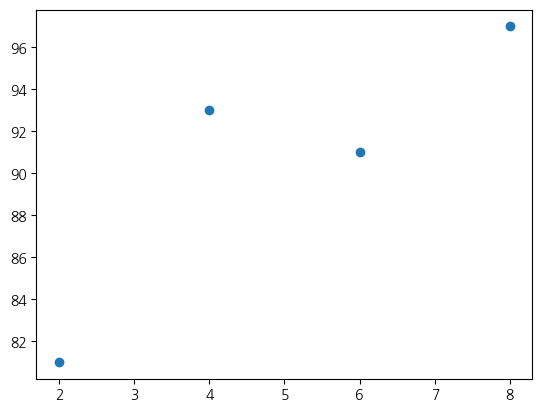

In [18]:
# 데이터의 분포를 산포도로
plt.scatter(x, y)
plt.show()

#### 4. 실행을 위한 변수 설정

In [19]:
# 기울기 a와 y절편 b의 초기화
a = 0
b = 0

# 학습률 정하기
lr = 0.03

# 반복횟수 정하기
epochs = 2001

#### 5. 경사 하강법

In [20]:
# 데이터 x의 개수 세기
n = len(x)

# 경사하강법 시작
for i in range(epochs):     # epochs 수 만큼 반복
    y_pred = a * x + b      # 예측값을 구하는 식
    error = y - y_pred      # 실제값과 예측값의 오차를 구합니다.

    a_diff = (-2 / n) * np.sum(x * (error))  # 오차함수를 a로 편미분한 값
    b_diff = (-2 / n) * np.sum((error))   # 오차함수를 b로 편미분한 값

    a = a - lr * a_diff             # 학습률을 곱해 기존의 a값을 업데이트
    b = b - lr * b_diff             # 학습률을 곱해 기존의 b값을 업데이트

    if i % 100 == 0:
        print(f"epochs = {i}, 기울기 = {a:,.4f}, y절편 = {b:,.4f}")

epochs = 0, 기울기 = 27.8400, y절편 = 5.4300
epochs = 100, 기울기 = 7.0739, y절편 = 50.5117
epochs = 200, 기울기 = 4.0960, y절편 = 68.2822
epochs = 300, 기울기 = 2.9757, y절편 = 74.9678
epochs = 400, 기울기 = 2.5542, y절편 = 77.4830
epochs = 500, 기울기 = 2.3956, y절편 = 78.4293
epochs = 600, 기울기 = 2.3360, y절편 = 78.7853
epochs = 700, 기울기 = 2.3135, y절편 = 78.9192
epochs = 800, 기울기 = 2.3051, y절편 = 78.9696
epochs = 900, 기울기 = 2.3019, y절편 = 78.9886
epochs = 1000, 기울기 = 2.3007, y절편 = 78.9957
epochs = 1100, 기울기 = 2.3003, y절편 = 78.9984
epochs = 1200, 기울기 = 2.3001, y절편 = 78.9994
epochs = 1300, 기울기 = 2.3000, y절편 = 78.9998
epochs = 1400, 기울기 = 2.3000, y절편 = 78.9999
epochs = 1500, 기울기 = 2.3000, y절편 = 79.0000
epochs = 1600, 기울기 = 2.3000, y절편 = 79.0000
epochs = 1700, 기울기 = 2.3000, y절편 = 79.0000
epochs = 1800, 기울기 = 2.3000, y절편 = 79.0000
epochs = 1900, 기울기 = 2.3000, y절편 = 79.0000
epochs = 2000, 기울기 = 2.3000, y절편 = 79.0000


#### 6. 그래프 확인

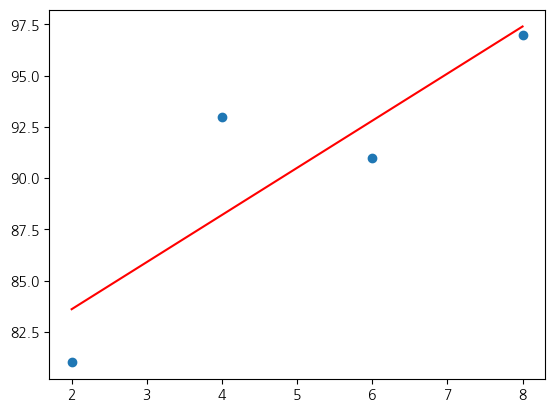

In [21]:
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입하여 그래프 그리기
y_pred = a * x + b

# 그래프 출력
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

### 4. 파이썬 코딩으로 확인하는 다중 선형 회귀

#### 1. 환경준비

In [22]:
import numpy as np
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt

#### 2. 데이터 준비

In [23]:
# 공부 시간 x1과 과외 시간 x2, 그 성적 y의 넘파이 배열을 만듭니다.
x1 = np.array([2, 4, 6, 8], dtype=float)
x2 = np.array([0, 4, 2, 3], dtype=float)
y = np.array([81, 93, 91, 97], dtype=float)

#### 3. 데이터 분포 확인

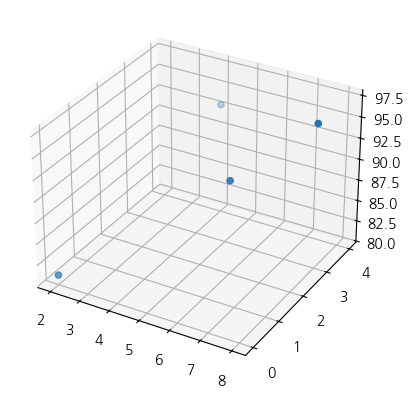

In [24]:
# 데이터의 분포를 그래프로 표현
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

#### 4. 실행을 위한 변수 설정

In [25]:
# 기울기와 y절편 초기화
a1 = 0
a2 = 0
b = 0

# 학습률 설정
lr = 0.01

# 반복횟수 설정
epochs = 2001

#### 5. 경사 하강법

In [26]:
# 데이터 x의 개수 세기
# x1과 x2의 개수가 같으므로 x1만 세기
n = len(x1)

# 경사하강법 시작
for i in range(epochs):     # epochs 수 만큼 반복
    y_pred = a1 * x1 + a2 * x2 + b      # 예측값을 구하는 식
    error = y - y_pred      # 실제값과 예측값의 오차를 구합니다.

    a1_diff = (-2 / n) * np.sum(x1 * (error))  # 오차함수를 a1로 편미분한 값
    a2_diff = (-2 / n) * np.sum(x2 * (error))  # 오차함수를 a2로 편미분한 값
    b_diff = (-2 / n) * np.sum((error))   # 오차함수를 b로 편미분한 값

    a1 = a1 - lr * a1_diff             # 학습률을 곱해 기존의 a1값을 업데이트
    a2 = a2 - lr * a2_diff             # 학습률을 곱해 기존의 a2값을 업데이트
    b = b - lr * b_diff             # 학습률을 곱해 기존의 b값을 업데이트

    if i % 100 == 0:
        print(f"epochs = {i}, a1 기울기 = {a1:,.4f}, a2 기울기 = {a2:,.4f} y절편 = {b:,.4f}")

epochs = 0, a1 기울기 = 9.2800, a2 기울기 = 4.2250 y절편 = 1.8100
epochs = 100, a1 기울기 = 9.5110, a2 기울기 = 5.0270 y절편 = 22.9205
epochs = 200, a1 기울기 = 7.3238, a2 기울기 = 4.2950 y절편 = 37.8751
epochs = 300, a1 기울기 = 5.7381, a2 기울기 = 3.7489 y절편 = 48.7589
epochs = 400, a1 기울기 = 4.5844, a2 기울기 = 3.3507 y절편 = 56.6800
epochs = 500, a1 기울기 = 3.7447, a2 기울기 = 3.0608 y절편 = 62.4448
epochs = 600, a1 기울기 = 3.1337, a2 기울기 = 2.8498 y절편 = 66.6404
epochs = 700, a1 기울기 = 2.6890, a2 기울기 = 2.6962 y절편 = 69.6938
epochs = 800, a1 기울기 = 2.3653, a2 기울기 = 2.5845 y절편 = 71.9160
epochs = 900, a1 기울기 = 2.1297, a2 기울기 = 2.5032 y절편 = 73.5333
epochs = 1000, a1 기울기 = 1.9583, a2 기울기 = 2.4440 y절편 = 74.7103
epochs = 1100, a1 기울기 = 1.8336, a2 기울기 = 2.4009 y절편 = 75.5670
epochs = 1200, a1 기울기 = 1.7428, a2 기울기 = 2.3695 y절편 = 76.1904
epochs = 1300, a1 기울기 = 1.6767, a2 기울기 = 2.3467 y절편 = 76.6441
epochs = 1400, a1 기울기 = 1.6286, a2 기울기 = 2.3301 y절편 = 76.9743
epochs = 1500, a1 기울기 = 1.5936, a2 기울기 = 2.3180 y절편 = 77.2146
epochs = 1600, a1 기울기

In [27]:
# 실제 점수와 예측된 점수를 출력하기
print(f"실제 점수: {y}")
print(f"예측 점수: {y_pred}")

실제 점수: [81. 93. 91. 97.]
예측 점수: [80.76387645 92.97153922 91.42520875 96.7558749 ]


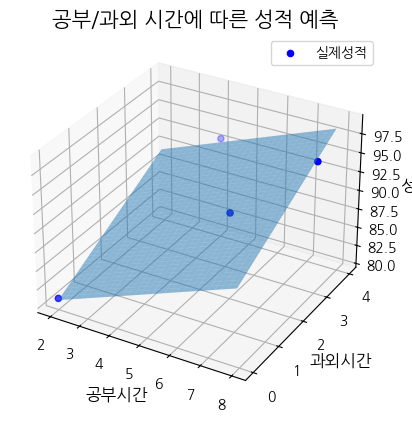

In [28]:
# 최적의 결과 그래프로 확인하기

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 실제 데이터 점 찍기
ax.scatter3D(x1, x2, y, c= 'blue', label = "실제성적")

# 평면을 그리기 위해 x1, x2데이터 범위로 2차원 격자 생성
plot_x1_range = np.arange(min(x1), max(x1), 0.1)
plot_x2_range = np.arange(min(x2), max(x2), 0.1)
x1_grid, x2_grid = np.meshgrid(plot_x1_range, plot_x2_range)

# 격자에 해당하는 z값(예측성적)을 계산
z_grid = a1 * x1_grid + a2 * x2_grid + b

# 평면 그리기
ax.plot_surface(x1_grid, x2_grid, z_grid, alpha=0.5)

# 축 레이블 설정 및 그래프 출력
ax.set_xlabel('공부시간', fontsize=12)
ax.set_ylabel('과외시간', fontsize=12)
ax.set_zlabel('성적', fontsize=12)
ax.set_title('공부/과외 시간에 따른 성적 예측', fontsize=15)
ax.legend()

plt.show()

### 5-1. 텐서플로에서 실행하는 선형 회귀 모델

- 딥러닝을 실행하기 위해 텐서플로라는 라이브러리의 케라스 API를 불러와 사용할 예정
- 선형 회귀의 개념과 딥러닝 라이브러리들이 어떻게 연결되는지 확인할 필요가 있음

- 선형 회귀는 현상을 분석하는 방법 중 하나
- 머신러닝은 이러한 분석방법을 이용해 예측 모델을 만드는 것
- 따라서 두 분야에서 사용하는 용어가 조금 다름

|선형회귀|머신러닝|
|:-------------------:|:----------:|
|예측을 위한 필요 식|가설 함수 H(x)|
|기울기 a|가중치 w|
|y절편|편향 b|
|평균 제곱 오차|손실 함수(loss function)|

#### 1. 환경준비

In [29]:
import numpy as np
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### 2. 데이터 준비

In [30]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

#### 3. 모델 실행

In [31]:
# 모델 생성
model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정
model.add(Dense(1, input_dim=1, activation='linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 1000번 반복
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 6822.5752
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1839.9797
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1102.7812
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 989.1605
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 967.1621
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 958.6553
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 952.1642
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 946.0032
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 939.9241
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 933.8907
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 927.8974
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 921.9429
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 916.0271
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 910.1495
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 

#### 4. 그래프 확인

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


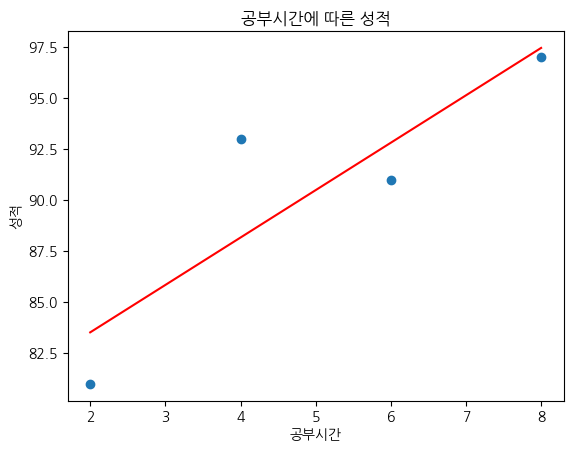

In [32]:
plt.title("공부시간에 따른 성적")
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로
plt.xlabel('공부시간')
plt.ylabel('성적')
plt.show()

#### 5. 모델 테스트

In [33]:
import tensorflow as tf

# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트

hour = 7
#prediction = model.predict([hour]) #텐서플로 2.9.0 까지만 가능

input_data = tf.constant([[hour]], dtype = tf.float32) # 텐서플로 버전업으로 인한 수정, 실수값을 입력하기 위함
prediction = model.predict(input_data)[0][0]  # 텐서플로 버전업으로 인한 수정

print(f"{hour:,.0f}시간을 공부할 경우의 예상 점수는 {prediction:,.2f}점입니다")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다


### 5-2. 텐서플로에서 실행하는 다중 선형 회귀 모델

#### 1. 환경 준비

In [34]:
import numpy as np
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### 2. 데이터 준비

In [35]:
# x : 학습시간, y : 과외 시간

x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

#### 3. 모델 실행

In [36]:
model = Sequential()

# 입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다.
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd' ,loss='mse')

model.fit(x, y, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 8098.3179
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1429.7458
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 955.2978
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 916.5158
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 908.4082
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 902.4919
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 896.7638
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 891.0824
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 885.4378
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 879.8290
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 874.2556
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 868.7178
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 863.2150
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 857.7469
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

#### 4. 모델 테스트

In [37]:
# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
private_class = 4
#prediction = model.predict([[hour, private_class]])  #텐서플로 2.9.0 까지만 가능

input_data = tf.constant([[hour, private_class]])  # 텐서플로 버전업으로 인한 수정
prediction = model.predict(input_data)[0][0]  # 텐서플로 버전업으로 인한 수정

print(f"{hour:,.0f}시간을 공부하고 {private_class:,.0f}'시간의 과외를 받을 경우, 예상 점수는 {prediction:,.2f}점입니다")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
7시간을 공부하고 4'시간의 과외를 받을 경우, 예상 점수는 98.20점입니다


## chapter06. 로지스틱 회귀 모델: 참 거짓 판단하기

### 1. 로지스틱 회귀의 정의

### 2. 시그모이드 함수

### 3. 오차 공식

- 시그모이드 함수의 특징은 y의 값의 범위가 0과 1사이임
- 실제 값이 1일 때 예측값이 0에 가까워 지면 오차는 커짐

- 이를 해결하기 위해 로그함수 사용

- 평균 제곱 오차를 대체할 만한 손실 함수$$ - \{y log h + (1-y)log(1-h)\}$$
- 이 함수를 머신러닝에서는 교체 엔트로피 오차 함수라고 함

### 5. 텐서플로에서 실행하는 로지스틱 회귀 모델

#### 1. 환경 준비

In [38]:
import numpy as np
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### 2. 데이터 준비

In [39]:
# 공부시간(x)에 따른 합격 여부(y) 데이터

x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

#### 3. 모델 실행

In [40]:
model = Sequential()

# 활성화함수를 시그모이드로 하기 위해 activation = 'sigmoid' 설정
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정합니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy')
model.fit(x, y, epochs=2000, verbose=1) #verbose=1 진행 화면 출력, verbose=0 진행 화면 출력 안함.

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 2.6664
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.6357
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.6050
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.5743
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.5437
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.5131
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.4825
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.4519
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.4214
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.3909
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.3604
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.3300
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.2995
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.2692
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.2388
Epo

#### 4. 모델 테스트

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


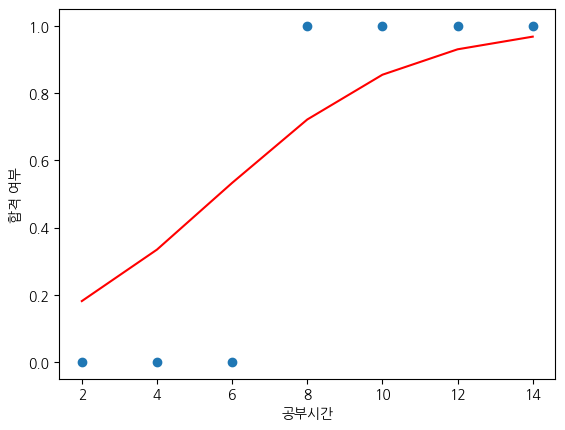

In [41]:
# 그래프 그리기

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.xlabel('공부시간')
plt.ylabel('합격 여부')
plt.show()

In [42]:
# 가상 데이터로 수치 확인하기

import tensorflow as tf

# 임의의 학습시간 7시간 입력
hour = 7.0

#prediction = model.predict([hour]) #텐서플로 2.9.0 까지만
input_data = tf.constant([[hour]])
prediction = model.predict(input_data)[0][0]

print(f'{hour:,.0f}시간을 공부할 경우, 합격 예상 확률은 {(prediction*100):,.1f}% 입니다.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
7시간을 공부할 경우, 합격 예상 확률은 63.2% 입니다.


# 셋째마당. 딥러닝의 시작, 신경망

## chapter07. 퍼셉트론과 인공지능의 시작

### 1. 인공지능의 시작을 알린 퍼셉트론

### 2. 퍼셉트론의 과제

### 3. XOR문제

## chapter08. 다층 퍼셉트론

### 1. 다층 퍼셉트론의 등장

### 2. 다층 퍼셉트론의 설계

### 3. XOR 문제의 해결

### 4. 코딩으로 XOR 문제 해결하기

#### 주어진 가중치와 바이어스를 이용해 XOR 문제를 해결하는 파이썬 코드

In [62]:
import numpy as np

# 정해진 가중치와 바이어스 선언
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])

b1 = 3
b2 = -1
b3 = -1

In [63]:
# 퍼셉트론 함수 만들기
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [65]:
# 게이트의 정의에 따라 NAND, OR, NAND, NOR 게이트를 구현하기

# NAND 게이트
def NAND(x1,x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1,x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1,x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1,x2):
    return AND(NAND(x1, x2),OR(x1,x2))

In [66]:
# x1, x2 값을 번갈아 대입해 가며 최종 값 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print(f"입력 값: {str(x)}, 출력 값: {str(y)}") 

입력 값: (0, 0), 출력 값: 0
입력 값: (1, 0), 출력 값: 1
입력 값: (0, 1), 출력 값: 1
입력 값: (1, 1), 출력 값: 0


In [4]:
# 
print("XOR 게이트의 진리표")
print("x1\t x2\t XOR")

XOR 게이트의 진리표
x1	 x2	 XOR


In [5]:
# wkehdzj